<a href="https://colab.research.google.com/github/Tanuja2725/classification/blob/main/1a_ta_feng_grocery_stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 25th August, 2022
My folder: /home/ashok/Documents/ta_feng_grocerystore
           C:\Users\ashok\OneDrive\Documents\Ta Feng Grocery Datasets

Ref:
     https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-grouping
     https://pandas.pydata.org/pandas-docs/stable/groupby.html

####################################################################3
# Ta Feng Grocery dataset
# Data Source: http://stackoverflow.com/questions/25014904/download-link-for-ta-feng-grocery-dataset
#	Other grocery datasets:
#		https://sites.google.com/a/dlpage.phi-integration.com/pentaho/mondrian/mysql-foodmart-database/foodmart_mysql.tar.gz?attredirects=0
#		http://recsyswiki.com/wiki/Grocery_shopping_datasets
# References on clustering/customer segmentation or on kohonen SOM:
# 		1. https://cran.r-project.org/web/views/Cluster.html
#   	2. http://www.shanelynn.ie/self-organising-maps-for-customer-segmentation-using-r/
#		3. General on kohonen: https://dzone.com/articles/self-organizing-maps
#		4. http://www.slideshare.net/jonsedar/customer-clustering-for-marketing
#
####################################################################

# Objectives:
            1. Reducing dataframe memory
            2. Understand customer behaviour (using pandas groupby)
            3. Chi-square Tests and mosaic plot
            4. t-test of means
            5. Feature Engineering

 ----Customer Behaviour----
 For  every customer (unique customerid)
	  Record his first purchase date
	  Record his last purchase date
	  Which customers purchase just one-time
	  Who are repeat purchasers	or who have visited more than once
	  Record every customers total purchases
	  Record every customers average purchases
	  Record his basket of purchases: Variety of goods he purchases
   Per visit/per transaction min. max items purchased and avg money spent
 For your store:
	  What is the distribution of customers age-wise?
	  What is the distribution of age, res-area-wise
	  Age wise what is the average purchase basket
   Is there age preference for a particular product sub-class
 For a product-subclass
	  Which product-subclass brings most revenue
   Which productids are most popular
	Which productIds are most costly
   And which customers purchase them?
 Tests:
   IS there a relationship between age and product_subclass
   IS there a relationship between residence_area and product_subclass
   IS there a relationship between age and residence_area

 #  Is there significant difference in avg spending, age-wise
   Is there significant difference in avg spending, residence wise

 Questions not answered
   Which days of week show heavy spending
   Which days of month show heavy spending
   Which days of week show least spending
   which days of month show leat spending
   What is customer life-time value
   What are quarter-wise sales of product (use thicken())
# *******************************
 ----Feature Engineering ----
# *******************************
  i)  Add a column to d12, that has counts of product_subclass
      as many times as it occurs (FE1)
  ii) Add a column to d12, that has counts of (age, residence_area)
      as many times as the combination occurs (FE2)
 iii) Add a column that has variance of (age,residence_area) wise spending (FE3)
 iv)  Create a loop for the purpose (FE4)





SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
path="/gdrive/MyDrive/colab_data_ files/27.08/dall.csv.zip"

In [ ]:

foldarpath="/gdrive/MyDrive/colab_data_ files/27.08"

## Call libraries

In [ ]:
## Call libraries
# 1.0 Reset memory
#     ipython magic command
#%reset -f
import pandas as pd
import numpy as np
import os
os.chdir(foldarpath)


# 1.1 For chi-square tests
from scipy.stats import chi2_contingency

# 1.2 For t-test
from scipy.stats import ttest_ind
# 1.3 Finding out score at a percentile point and
#     pearson correlation coeff function
from scipy.stats import scoreatpercentile, pearsonr


# 1.4
import matplotlib.pyplot as plt
import seaborn as sns
# 1.4.1 Mosaic plots
# https://www.statsmodels.org/dev/graphics.html
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html#statsmodels.graphics.mosaicplot.mosaic
from statsmodels.graphics.mosaicplot import mosaic


# 1.5 Misc facilities
from collections import Counter
import os, time, sys, gc


In [ ]:
os.listdir('/gdrive/MyDrive/colab_data_ files/27.08')

['dall.csv.zip']

In [ ]:


# 1.6 Print/display mutiple command outputs from a jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Mount gdrive

In [ ]:
# 1.7 Mount gdrive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 2.0 Set working folder and list files
#
pathToFolder = "/gdrive/MyDrive/colab_data_ files/27.08"
os.chdir(pathToFolder)
os.listdir()


['dall.csv.zip']

## Define function to reduce mem usage

In [ ]:
# 2.1 This function reduces memory usage of a DataFrame
# Ref: https://www.kaggle.com/c/champs-scalar-coupling/discussion/96655
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## Read data & Reduce memory

In [ ]:
# 2.1 Read directly from zip file 
df = pd.read_csv("dall.csv.zip", parse_dates = ['datetime'])

In [ ]:
df.memory_usage().sum()

58873736

In [ ]:


# 2.1.1 Some exploration
df.head()
df.describe()

,datetime,customerid,age,residence_area,product_subclass,productid,quantity,asset,salesprice
0,2000-11-01,46855,D,E,110411,4710085120468,3,51,57
1,2000-11-01,539166,E,E,130315,4714981010038,2,56,48
2,2000-11-01,663373,F,E,110217,4710265847666,1,180,135
3,2000-11-01,340625,A,E,110411,4710085120697,1,17,24
4,2000-11-01,236645,D,H,712901,8999002568972,2,128,170


,customerid,product_subclass,productid,quantity,asset,salesprice
count,8.176890e+05,817689.000000,8.176890e+05,817689.000000,817689.000000,817689.000000
mean,1.406627e+06,284949.244709,4.461631e+12,1.381783,112.110445,131.875923
std,7.489881e+05,226390.225824,1.690096e+12,2.897561,603.680287,631.076586
min,1.069000e+03,100101.000000,2.000882e+07,1.000000,0.000000,1.000000
25%,9.692220e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.587722e+06,130106.000000,4.710421e+12,1.000000,62.000000,76.000000
75%,1.854930e+06,520314.000000,4.712500e+12,1.000000,112.000000,132.000000
max,2.000200e+07,780510.000000,9.789580e+12,1200.000000,432000.000000,444000.000000


In [ ]:
# 2.1.2 Examine data types now
df.dtypes

datetime            datetime64[ns]
customerid                   int64
age                         object
residence_area              object
product_subclass             int64
productid                    int64
quantity                     int64
asset                        int64
salesprice                   int64
dtype: object

In [ ]:
# 2.1.3
df = reduce_mem_usage(df)
gc.collect()


Mem. usage decreased to 38.99 Mb (30.6% reduction)


110

In [ ]:
# 2.1.4. We have no use for 'asset' column. Drop it

df.drop(columns = ['asset'], inplace = True)


In [ ]:
# 3.1
# To further save memory, transform following five attributes
#  to pandas 'category' type

#  1. customerid --------int64,
#  2. product_subclass---int64,
#  3. residence_area-----object,
#  4. age----------------object,
#  5. productid----------int64

"Current memory usage: {} ".format(df.memory_usage().sum())

'Current memory usage: 37613822 '

In [ ]:
# 3.1.1 Transform now:

df['customerid']       = df['customerid'].astype('category')
df['product_subclass'] = df['product_subclass'].astype('category')
df['residence_area']   = df['residence_area'].astype('category')
df['age']              = df['age'].astype('category')
df['productid']        = df['productid'].astype('category')

In [ ]:

# 3.1.2

"Present memory: {} ".format(df.memory_usage().sum())
print()
gc.collect()            # Release memory back to system

'Present memory: 20106078 '

176

In [ ]:
# 3.2 Extract year, month, day`from 'datetime' field
# Ref:https://pandas.pydata.org/pandas-docs/version/0.22/api.html#datetimelike-properties
#     https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html

# 3.2.1 
df['year']  =  df['datetime'].dt.year
df['month'] =  df['datetime'].dt.month
df['day']   =  df['datetime'].dt.day

##Practice

In [ ]:
dx = pd.DataFrame([('a1', 'b1',43,67),('a2', 'b1',40,60),('a1', 'b2',48,77),('a2', 'b1',61,67),('a1', 'b1',83,87),('a1', 'b2',93,97) ], columns = ['x1','x2','x3','x4'])

In [ ]:
dx

,x1,x2,x3,x4
0,a1,b1,43,67
1,a2,b1,40,60
2,a1,b2,48,77
3,a2,b1,61,67
4,a1,b1,83,87
5,a1,b2,93,97


In [ ]:
h=np.array(['A1','A1','A2','A2','A2','A1'])
h1=np.array(['B11','B11','B21','B21','B21','B11'])

In [ ]:
grpd = dx[['x3','x4']].groupby([h,h1])

In [ ]:
grpd.mean()

,,x3,x4
A1,B11,58.666667,74.666667
A2,B21,64.000000,77.000000


In [ ]:
grpd=dx[['x3','x4']].groupby([dx['x1'],dx['x2']])

In [ ]:
grpd1=dx.groupby(['x1','x2'])

In [ ]:
grpd.mean()

x3    x4
x1 x2            
a1 b1  63.0  77.0
   b2  70.5  87.0
a2 b1  50.5  63.5

In [ ]:
grpd=dx.groupby([dx['x1']])

In [ ]:
grpd

In [ ]:
grpd.mean()

,x3,x4
x1,,
a1,66.75,82.0
a2,50.50,63.5


In [ ]:
grpd.count()

,x2,x3,x4
x1,,,
a1,4,4,4
a2,2,2,2


In [ ]:
grpd.std()

,x3,x4
x1,,
a1,24.958299,12.909944
a2,14.849242,4.949747


In [ ]:
dx.x4

0    67
1    60
2    77
3    67
4    87
5    97
Name: x4, dtype: int64

In [ ]:
grpd1=dx[['x4']].groupby([dx['x1']])

In [ ]:
grpd1.mean()

,x4
x1,
a1,82.0
a2,63.5


In [ ]:
grpd[['x4']].sum()

,x4
x1,
a1,328
a2,127


In [ ]:
type(dx['x4'])

pandas.core.series.Series

In [ ]:
type(dx[['x4']])

pandas.core.frame.DataFrame

In [ ]:
dx.x4.sum()


455

## Start asking questions

In [ ]:
# Here is your data
df.head(3)

,datetime,customerid,age,residence_area,product_subclass,productid,quantity,salesprice,year,month,day
0,2000-11-01,46855,D,E,110411,4710085120468,3,57,2000,11,1
1,2000-11-01,539166,E,E,130315,4714981010038,2,48,2000,11,1
2,2000-11-01,663373,F,E,110217,4710265847666,1,135,2000,11,1


### Q1
How many unique customers, products & product_subclasses exist

In [ ]:
df['customerid'].nunique()

32266

#### Answer

In [ ]:
# 4 (Q1) How many unique customers, productids & product_subclasses exist
print("\n Unique customer Ids--")
df['customerid'].nunique()                      # 32266


print("\n\n==Unique products Ids==")
df['productid'].nunique()                       # 23812

print("\n\n==Unique Product classes Ids==")
df['product_subclass'].nunique()                # 2012


 Unique customer Ids--


32266



==Unique products Ids==


23812



==Unique Product classes Ids==


2012

### Q2
Who are the oldest customers?

In [ ]:
df['datetime'].min()

Timestamp('2000-11-01 00:00:00')

In [ ]:
df.sort_values(by='datetime',ascending=True)

,datetime,customerid,age,residence_area,product_subclass,productid,quantity,salesprice,year,month,day
0,2000-11-01,46855,D,E,110411,4710085120468,3,57,2000,11,1
823,2000-11-01,2052472,K,H,110411,4710085172696,2,38,2000,11,1
822,2000-11-01,958448,C,E,110507,4710172030021,1,145,2000,11,1
821,2000-11-01,1202335,E,E,120103,4710857000059,1,16,2000,11,1
820,2000-11-01,958448,C,E,110517,4710063131370,1,196,2000,11,1
...,...,...,...,...,...,...,...,...,...,...,...
811440,2001-02-28,1579505,C,F,530404,4710186184192,1,135,2001,2,28
811441,2001-02-28,1694581,B,E,100306,4710022445708,1,98,2001,2,28
811442,2001-02-28,1500820,D,G,100305,4710174041551,2,84,2001,2,28
811426,2001-02-28,1862799,F,E,110217,4719090900065,2,274,2001,2,28


In [ ]:
grpd['datetime'].min().sort_values(ascending = True)

KeyError: ignored

#### Answer

In [ ]:
####### Groupby:
# 5.1 (Q2) 
#          Sol: Gr by customerid and for each
#               customer find his min date. Then, sort it
#               to find earliest purchase date of every customer

# Show some groupby operations here

grpd = df.groupby(['customerid'])
grpd


In [ ]:
# 5.1.1 
grpd['datetime'].min().sort_values(ascending = True)

customerid
151153    2000-11-01
1717723   2000-11-01
309448    2000-11-01
1620320   2000-11-01
75275     2000-11-01
             ...    
1941692   2001-02-28
2090092   2001-02-28
1990607   2001-02-28
1739381   2001-02-28
611770    2001-02-28
Name: datetime, Length: 32266, dtype: datetime64[ns]

### Q3
Recency: Find the last purchase date of every customer

In [ ]:
df.groupby('customerid')['datetime'].max().sort_values(ascending = False)

customerid
938846    2001-02-28
1141344   2001-02-28
1910537   2001-02-28
1909791   2001-02-28
1909548   2001-02-28
             ...    
2057583   2000-11-01
1173741   2000-11-01
2144511   2000-11-01
663373    2000-11-01
2116334   2000-11-01
Name: datetime, Length: 32266, dtype: datetime64[ns]

In [ ]:
 df.groupby('customerid')['datetime'].max().sort_values(ascending = False)

customerid
938846    2001-02-28
1141344   2001-02-28
1910537   2001-02-28
1909791   2001-02-28
1909548   2001-02-28
             ...    
2057583   2000-11-01
1173741   2000-11-01
2144511   2000-11-01
663373    2000-11-01
2116334   2000-11-01
Name: datetime, Length: 32266, dtype: datetime64[ns]

In [ ]:
df.groupby([df['customerid'].df['datetime']]).count()

AttributeError: ignored

#### Answer

In [ ]:
# 5.2 (Q3) Sol:Group by customerid and find the last date of purchase

result1 = df.groupby('customerid')['datetime'].max().sort_values(ascending = False)
result1.head()
result1.size    # 32266


customerid
938846    2001-02-28
1141344   2001-02-28
1910537   2001-02-28
1909791   2001-02-28
1909548   2001-02-28
Name: datetime, dtype: datetime64[ns]

32266

### Q4
Discover Repeat customers: Find repeat customers

In [ ]:
df['datetime'].groupby(df['customerid']).count().sort_values(ascending=False)

customerid
20459      1246
2112589     879
2112596     822
2113579     776
1847994     754
           ... 
926430        1
924689        1
2057941       1
923415        1
2009636       1
Name: datetime, Length: 32266, dtype: int64

In [ ]:
df['datetime'].groupby(df['customerid']).nunique().sort_values(ascending=False)>1

customerid
2023939     True
2019604     True
1846607     True
1846904     True
1847994     True
           ...  
668101     False
1783919    False
1784039    False
667982     False
1663402    False
Name: datetime, Length: 32266, dtype: bool

#### Answer

In [ ]:
## 5.3 (Q4): 
##           Many ways to find repeat-customers
##           a. Group customers by both cid and date and count
##           b. Group the earlier table by cid and count
##           c. Use apply with function
##           d. Use apply with lambda

In [ ]:
# 5.4 Method 1: In each box how many unique datetime are there
out = df.groupby(df['customerid'], as_index = False)
out['datetime'].nunique()

,customerid,datetime
0,1069,4
1,1113,4
2,1250,2
3,1359,1
4,1823,3
...,...,...
32261,2179544,1
32262,2179568,1
32263,2179605,1
32264,2179643,1


In [ ]:
# 5.4.1 Check for one customerid
df.loc[df['customerid'] == 1069]

,datetime,customerid,age,residence_area,product_subclass,productid,quantity,salesprice,year,month,day
96123,2000-11-13,1069,K,E,100314,4710176008699,1,98,2000,11,13
97529,2000-11-13,1069,K,E,100205,9556439880610,1,89,2000,11,13
535002,2001-01-21,1069,K,E,110333,4710320224661,1,425,2001,1,21
535121,2001-01-21,1069,K,E,100311,4710022101208,1,198,2001,1,21
535233,2001-01-21,1069,K,E,110333,4712603661644,1,348,2001,1,21
641698,2001-02-10,1069,K,E,110217,4712162000038,2,290,2001,2,10
694281,2001-02-03,1069,K,E,100101,22000167620,2,192,2001,2,3
694422,2001-02-03,1069,K,E,120106,4710011402026,2,46,2001,2,3
695052,2001-02-03,1069,K,E,110117,4903101125107,2,58,2001,2,3
695211,2001-02-03,1069,K,E,110108,4710088620156,2,130,2001,2,3


In [ ]:
# 5.4.2 Exclude where visit is 1
out[out > 1].sort_values(ascending = False)

TypeError: ignored

In [ ]:
#5.5 Use apply()
# 5.5.1 First define a function:
#       Function must return either a scalar or a pandas object
#       Its argument is a dataframe

def atx(fd):
    return fd.datetime.nunique()


# 5.5.2 First group by 'customerid'
grouped = df.groupby('customerid')


# 5.5.3 Extract a data subset
#       Each subset is a dataframe
r1 = grouped.get_group(1975543)
r1                  # It is a dataframe
type(r1)
r2 = grouped.get_group(915939)
r2                 # Another dataframe

# 5.5.3 To test, apply the function
#       to each subset
atx(r1)
atx(r2)


# 5.5.4 Finally apply the function tx()
#       ti each grouped-subset
grouped.apply(atx).sort_values(ascending = False)

# 5.6 Use lambda
#     Each 'x' passed in lambda is a babay-dataframe
#     And value returned is True/False
grouped = df.groupby('customerid')

result = grouped['datetime'].apply(lambda x : x.nunique() > 1).sort_values()
result.head()



,datetime,customerid,age,residence_area,product_subclass,productid,quantity,salesprice,year,month,day
19177,2000-11-04,1975543,C,A,560201,4902430493437,1,294,2000,11,4
142793,2000-11-21,1975543,C,A,560201,4901301011732,1,358,2000,11,21
142812,2000-11-21,1975543,C,A,530114,4710032604799,1,195,2000,11,21
142818,2000-11-21,1975543,C,A,110401,4710249002012,1,47,2000,11,21
143023,2000-11-21,1975543,C,A,100201,4710247007422,1,56,2000,11,21
143162,2000-11-21,1975543,C,A,560117,4715610088091,1,123,2000,11,21
143263,2000-11-21,1975543,C,A,560402,4710498123339,1,483,2000,11,21
143374,2000-11-21,1975543,C,A,560402,9318017207031,1,394,2000,11,21
143395,2000-11-21,1975543,C,A,530505,4710689103232,1,60,2000,11,21
143626,2000-11-21,1975543,C,A,560201,4710363960502,1,445,2000,11,21


pandas.core.frame.DataFrame

,datetime,customerid,age,residence_area,product_subclass,productid,quantity,salesprice,year,month,day
815900,2001-02-28,915939,D,G,110217,4710265847666,2,278,2001,2,28


3

1

customerid
2023939    86
2019604    85
1846607    81
1846904    79
1847994    76
           ..
668101      1
1783919     1
1784039     1
667982      1
1663402     1
Length: 32266, dtype: int64

customerid
1663389    False
1972627    False
1433227    False
1433333    False
1972535    False
Name: datetime, dtype: bool

### Q5
 What are total no of visits of a customer during the period of data?

#### Answer

In [ ]:
# 6.  (Q5): What is total no of visits of a customer during the period of data
#     Sol:Group by customerid, find distinct dates & count them
"""
# Which aggregating functions will work?
   The aggregating functions above will exclude NA values.
   Any function which reduces a Series to a scalar value is
   an aggregation function and will work, a trivial example
   is df.groupby('A').agg(lambda ser: 1).

"""

out = df.groupby(df['customerid'])['datetime'].nunique().sort_values(ascending=False)
out.head()
out.tail()

"\n# Which aggregating functions will work?\n   The aggregating functions above will exclude NA values.\n   Any function which reduces a Series to a scalar value is\n   an aggregation function and will work, a trivial example\n   is df.groupby('A').agg(lambda ser: 1).\n\n"

customerid
2023939    86
2019604    85
1846607    81
1846904    79
1847994    76
Name: datetime, dtype: int64

customerid
668101     1
1783919    1
1784039    1
667982     1
1663402    1
Name: datetime, dtype: int64

In [ ]:
# 6.1 Check for a customerid:

out.loc[1069]

4

In [ ]:
# 6.2 Let us see distribution of visit-frequencies
# 6.2.1  First convert out (pandas Series) to DataFrame

out.name           # This series name will become column name



'datetime'

In [ ]:
# 6.2.2 Assign a name to the Series:

out.name = "freq"

In [ ]:
# 6.2.3 Transform the Series to DataFrame
#      Series name becomes its column name

out = pd.DataFrame(out)   # column name is now 'freq'

(0.0, 20.0)

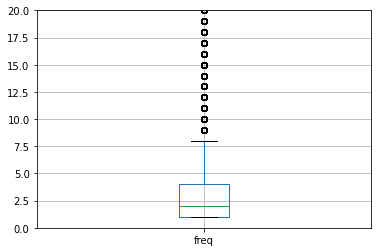

In [ ]:
# 6.2.4 Draw boxplot now uisng pandas plot function:

out.boxplot(column = 'freq')
plt.ylim((0,20))
plt.show()


In [ ]:
# 6.3 Let us verify the above results for at least one customerid:

df.loc[df['customerid'] == 1847994 ].nunique()

datetime             76
customerid            1
age                   1
residence_area        1
product_subclass    288
productid           593
quantity             11
salesprice          222
year                  2
month                 4
day                  30
dtype: int64

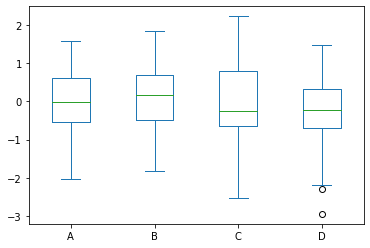

In [ ]:
# 6.3.1 Box plots with pandas:

data = np.random.randn(25, 4)
dfx = pd.DataFrame(data, columns=list('ABCD'))
dfx.plot.box();

### Q6
What are total spending per customer?

In [ ]:
df.head()

,datetime,customerid,age,residence_area,product_subclass,productid,quantity,salesprice,year,month,day
0,2000-11-01,46855,D,E,110411,4710085120468,3,57,2000,11,1
1,2000-11-01,539166,E,E,130315,4714981010038,2,48,2000,11,1
2,2000-11-01,663373,F,E,110217,4710265847666,1,135,2000,11,1
3,2000-11-01,340625,A,E,110411,4710085120697,1,24,2000,11,1
4,2000-11-01,236645,D,H,712901,8999002568972,2,170,2000,11,1


In [ ]:
df['purchase']=df['quantity']*df['salesprice']

In [ ]:
# 7 (Q6): 
#    Sol: Group by customerid and sum up purchases

# 7.1 First create a new column 'purchase'
df['purchase'] = df['quantity'] * df['salesprice']

# 7.1.1 Now calculate total purchases per customer
out = df.groupby(['customerid'])['purchase'].sum().sort_values(ascending = False)

# 7.1.2 out is a pandas Series
out.head()

# 7.1.3 Make out a DataFrame
out = pd.DataFrame(out)

customerid
1622362    355221564
2123851     17797777
2120829     17795024
1970777     14880612
2134819     14843035
Name: purchase, dtype: int32

<Figure size 432x288 with 0 Axes>

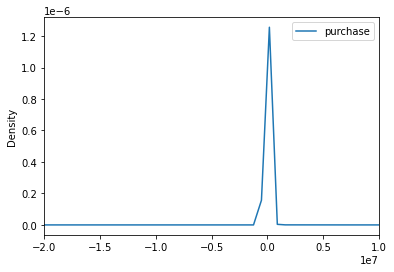

In [ ]:
# 7.2 Let us have a density plot of these purchases:

plt.figure() ;
out.plot.kde()     # Pandas kernel denity plot
plt.xlim(-0.2e8, .1e8) ;
plt.show() ;

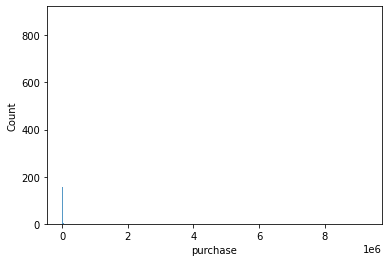

In [ ]:
# 7.2.1 seaborn does not plot that well:

out1 = out.sample(n = 5000)
sns.histplot(data = out1, x = 'purchase')
plt.show()

<Figure size 432x288 with 0 Axes>

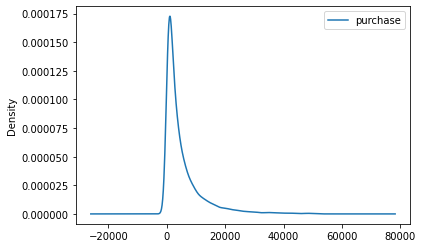

In [ ]:
# 7.2.2 So there is an outlier, let us remove
#       it and then plot. We will cutoff at 99th percentile
#       At what value of data 99th percentile occurs?

scoreatpercentile(out.values, per = 99)

# 7.2.3 Here is remaining data

out = out.loc[out['purchase'] < 52135, :]


# 7.2.4 Plot density plot now
plt.figure() ;
out.plot.kde() ;
plt.show() ;

### Q7
Is there any relationship between freq of visits and total purchases?

In [ ]:
totalp = df['purchase'].groupby([df['customerid']]).sum()
freq = df['datetime'].groupby(df['customerid']).nunique()

In [ ]:
totalp.head()

customerid
1069    2660
1113    3209
1250    1795
1359     602
1823    6053
Name: purchase, dtype: int32

In [ ]:
freq.head()

customerid
1069    4
1113    4
1250    2
1359    1
1823    3
Name: datetime, dtype: int64

In [ ]:
freq.sort_index(inplace=True)
totalp.sort_index(inplace=True)

In [ ]:
freq_purchases = pd.concat([freq,totalp], axis = 1)

In [ ]:

freq_purchases.head()

,datetime,purchase
customerid,,
1069,4,2660
1113,4,3209
1250,2,1795
1359,1,602
1823,3,6053


In [ ]:
pd.merge(freq, totalp, left_index=True, right_index=True)

,datetime,purchase
customerid,,
1069,4,2660
1113,4,3209
1250,2,1795
1359,1,602
1823,3,6053
...,...,...
2179544,1,6343
2179568,1,406
2179605,1,9495


In [ ]:
freq_purchases.corr()

,datetime,purchase
datetime,1.000000,0.026599
purchase,0.026599,1.000000


In [ ]:
import seaborn as sns

In [ ]:
freq

customerid
1069         4
1113         4
1250         2
1359         1
1823         3
            ..
2179544      1
2179568      1
2179605      1
2179643      1
20002000    27
Name: datetime, Length: 32266, dtype: int64

In [ ]:

scoreatpercentile(freq_purchases,99)

35291.88000000012

In [ ]:

scoreatpercentile(freq_purchases,100)

355221564.0

In [ ]:
scoreatpercentile(freq_purchases,50)

36.0

In [ ]:
freq_purchases.purchase.max()

355221564

In [ ]:
dg=freq_purchases.loc[freq_purchases['purchase'] < 52135,:] 

In [ ]:
dg.corr()

,datetime,purchase
datetime,1.000000,0.513523
purchase,0.513523,1.000000


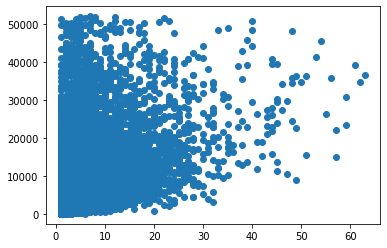

In [ ]:
plt.scatter(dg.datetime,dg.purchase)


#extra


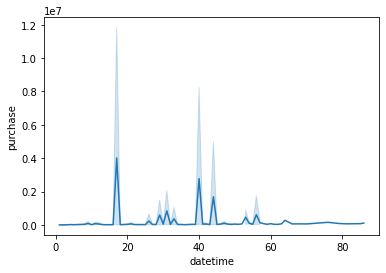

In [ ]:
import seaborn as sn
sn.lineplot(x = freq_purchases.datetime, y = freq_purchases.purchase)

#### Answer

In [ ]:
# 8. Is there any relationship between freq of visits and total purchases
#    We will use two methods:

## Method 1

# 8.1   First customer-wise visit frequencies:

freq = df.groupby('customerid')['datetime'].nunique()
freq.name = "freq"
freq.head()

customerid
1069    4
1113    4
1250    2
1359    1
1823    3
Name: freq, dtype: int64

In [ ]:
# 8.2 Then customer-wise purchases:

purchases = df.groupby('customerid')['purchase'].sum()
purchases

customerid
1069         2660
1113         3209
1250         1795
1359          602
1823         6053
            ...  
2179544      6343
2179568       406
2179605      9495
2179643      8461
20002000    90397
Name: purchase, Length: 32266, dtype: int32

In [ ]:
# 8.3 Create a dataframe from two continuous series:

freq_purchases = pd.concat([freq,purchases], axis = 1)
freq_purchases.head()

,freq,purchase
customerid,,
1069,4,2660
1113,4,3209
1250,2,1795
1359,1,602
1823,3,6053


In [ ]:
# 8.4 So what kind of relationships exist?
#     Answer: Very weak!

freq_purchases.corr()

,freq,purchase
freq,1.000000,0.026599
purchase,0.026599,1.000000


In [ ]:
# 8.5 Include only points which are below 99th percentile of purchases

freq_purchases = freq_purchases[freq_purchases['purchase'] < 52135]

In [ ]:
# 8.6 Let us revisit relationships
#     Relationship is stronger though not very strong

freq_purchases.corr()

,freq,purchase
freq,1.000000,0.513523
purchase,0.513523,1.000000


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

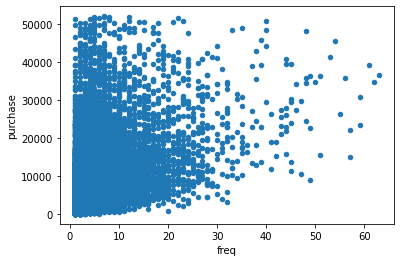

In [ ]:
# 8.7 Plot and also annotate now
#     First through pandas plotting methods
plt.figure()
freq_purchases.plot.scatter(x = 'freq', y = 'purchase')
plt.show()

### Q8
What are average purchases per-customer, per visit?

#### Answer

In [ ]:
# 9. (Q8):  What are average purchases per-customer, per visit
#     Sol: Simple: Gr by customerid,datetime and sum up purchases
#
result = df.groupby(['customerid', 'datetime'])['purchase'].sum()
result.head()

In [ ]:
# 9.1 Note that grouping by more than one attribute
#     creates multiindex. Here it has two levels

result.index.get_level_values(0)
result.index.get_level_values(1)

In [ ]:
# 9.2 Unentangle it using unstack()
result1 = df.groupby(['customerid', 'datetime'])['purchase'].sum().unstack()
result1.head()

In [ ]:
# 9.3 Find mean, across columns
#     And this our answer to the question
df.groupby(['customerid', 'datetime'])['purchase'].sum().unstack().mean(axis = 1, skipna = True).head()

In [ ]:
# 9.4 Let us verify the result for at least one customer
df[df['customerid'] == 1069].groupby('datetime')['purchase'].sum()
(187 + 971 + 922 + 580)/4               # 665


### Q9

 What are average purchases customer-wise?

####Answer

In [ ]:
# 10 (Q9): 
#          Sol: Gr by customerid and find mean() purchases per id

df.groupby('customerid')['purchase'].mean().sort_values(ascending = False)


### Q10
Determine customer-wise, product_subclass preference?

#### Answer

In [ ]:
## 11. Q9
# 11.1 
#     We will define preference as no of different datetimes purchased.
#     All purchases of a product_subclass on one date count to one.

result = df.groupby(['customerid', 'product_subclass'])['datetime'].nunique().sort_values(ascending= False)
result.head()

# 11.2 Just to extract result for one customer from this multiindex, use
#      index.get_level_values()....rather complicated but works
#  Ref: https://stackoverflow.com/questions/17921010/how-to-query-multiindex-index-columns-values-in-pandas
result.loc[result.index.get_level_values('customerid')  == 1740653, :]


# 11.3 But if preference means by quantity, then solution is:
df.groupby(['customerid', 'product_subclass'])['quantity'].sum().sort_values(ascending= False)

### Q11
Customer-wise basket of purchases

#### Answer

In [ ]:
# 12 (Q10): Basket of purchases:
#            Variety of purchases made per customer, Productid wise

df.groupby(['customerid'])['productid'].nunique().sort_values(ascending = False)


### Q12
Which product_class brings most revenue?

#### Answer

In [ ]:
# 13  Which product_class brings most revenue
#        Sol: Group by product_subclass and add quantity * salesprice

# 13.1 Here is the solution:
df.groupby(['product_subclass'])['purchase'].sum()


### Q13
Which product_subclass is popular that is         most customers buy?

#### Answer

In [ ]:
# 13.2 (Q12): Which product_subclass is popular that is
#             most customers buy?
df.groupby(['product_subclass'])['customerid'].nunique().sort_values(ascending=False)


### Exercise questions


In [ ]:
## Not solved. Students to solve these
# 13.3 (Q14): Age wise purchases average. Which age group max purchases
#             Just group by age

# 13.4 (Q15): Residence area wise purchasing capacity
#             Just group by residence area wise


# 13.5 (Q16)  Per visit/per transaction avg money spent


# 14   (Q17): Distribuiton of age groups with residence_area
#             Same as:  table(d12$age, d12$residence_area)

# 15.  (Q18)    What is the distribution of customers, age-wise


### Q14
Is there a relationship between 'age' and 'residence_area'?

#### Answer

In [ ]:

# 16. (Q18) Is there a relationship between 'age' and 'residence_area'
#           We will calculate ch-square statistics
#           An often quoted guideline for the validity of chi-square calculation
#           is that the test should be used only if the observed and expected
#           frequencies in each cell are at least 5.

# 16.1 Return values are: chi2 statistic, p-value, degrees-of-freedom, expected-freq
chi2_contingency(pd.crosstab(df.age, df.residence_area))     # p-value = 0
# OR
# 16.2
chi2, p_value, dof, expeFreq = chi2_contingency(pd.crosstab(df.age, df.residence_area))
p_value



# 17. Mosiac plot of contingency table
#     At a glance view of deviation from expected freq
# statistic=True  will give colors to the plot. If the tile has a freq
#   is more than 2 standard deviation from the expected value
#    color will go from green to red (for positive deviations, blue otherwise)
#     and will acquire an hatching when crosses the 3 sigma.
fig = plt.figure(figsize = (10,10))     # Set figure size
ax = fig.add_subplot(111)               # Add one subplot
mosaic(df, ['age', 'residence_area'],
       ax = ax,
       statistic = True
       )
plt.show()


# 18   t-test IS there any significant difference in avg spending
#        age-wise, say, between ages 'A' and 'B'
#   Steps:
#        1. Extract spending data for two ages
#        2. Discover 99th percentile points for each
#        3. Remove outliers
#        4. Perform t-test

# 18.1 'purchase' data for age = 'A'
a = df.loc[df['age'] == 'A', 'purchase']
len(a)              # 30068

# 18.2 'purchase' data for age = 'B'
b = df.loc[df['age'] == 'B', 'purchase']
len(b)              # 66427

# 18.3 Conduct t-test now. Are the means of two purchases equal?
_, pvalue = ttest_ind( a, b, axis=0)
pvalue      # 0.18781 So no difference in purchase mean

# 18.4 Let us remove few outliers and then again perform t-test
#      What is the 99th percentile in each case
scoreatpercentile(a, per = 99)             # 2558
scoreatpercentile(b, per = 99)             # 3029

# 18.5 Extract from 'a' & 'b' values other than outlers
a= a[a<2558]
b = b[b<3029]
len(a)        # 29767
len(b)        # 65762

# 18.6 Perform t-test now:
# 18.7 Removing outliers drastically alters the conclusion
_, pvalue = ttest_ind( a, b, axis=0)
pvalue             # 3.060e-42



## Finish
 ---------------------I am done------------------------------------